In [1]:
# Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import the dataset

In [4]:
coke = pd.read_excel("D:\Data science\Assignments docs\Forecasting\CocaCola_Sales.xlsx")
coke.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
coke.shape

(42, 2)

In [6]:
coke.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [7]:
coke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


### Converting the 'Quarter' format to datetime format

In [12]:
index = []
for i in range(42):
    p = i
    index.append(i)

In [14]:
coke['index'] = index

In [15]:
coke.head()

,Quarter,Sales,index
0,Q1_86,1734.827000,0
1,Q2_86,2244.960999,1
2,Q3_86,2533.804993,2
3,Q4_86,2154.962997,3
4,Q1_87,1547.818996,4


### Converting 'index' column as index

In [16]:
coke.set_index('index', inplace=True)

In [17]:
coke.head()

,Quarter,Sales
index,,
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


### Visualizing the data

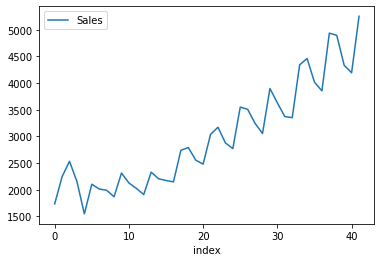

In [18]:
coke.plot()

### Testing for stationarity

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
# Defining a function for ADF test

In [21]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test statistic','p-values','#Lags Used','Number of observations used'] 
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is not stationary")

In [22]:
adfuller_test(coke['Sales'])

ADF Test statistic : 1.3094210153268138
p-values : 0.9966611673930905
#Lags Used : 7
Number of observations used : 34
The data is not stationary


#### Since the data is not stationary, we have to difference it to make it stationary

In [24]:
coke_diff = coke["Sales"].diff(periods=1)

In [25]:
coke_diff.head()

index
0           NaN
1    510.133999
2    288.843994
3   -378.841995
4   -607.144001
Name: Sales, dtype: float64

In [26]:
# Again testing using dickey fuller test

In [28]:
adfuller_test(coke_diff.dropna())

ADF Test statistic : -2.5015370020337975
p-values : 0.1151008033240557
#Lags Used : 3
Number of observations used : 37
The data is not stationary


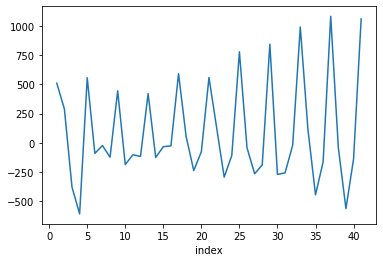

In [30]:
coke_diff.plot()

#### The p-value is still higher and its not stationary after first order differentiation, hence going for 2nd order differentiatio

In [31]:
# Another order of differentiation

In [32]:
coke_diff2 = coke_diff.diff(periods=1)

In [33]:
coke_diff2.head()

index
0           NaN
1           NaN
2   -221.290005
3   -667.685989
4   -228.302006
Name: Sales, dtype: float64

In [34]:
# Again testing using dickey fuller test

In [35]:
adfuller_test(coke_diff2.dropna())

ADF Test statistic : -27.632624946381682
p-values : 0.0
#Lags Used : 2
Number of observations used : 37
The data is stationary


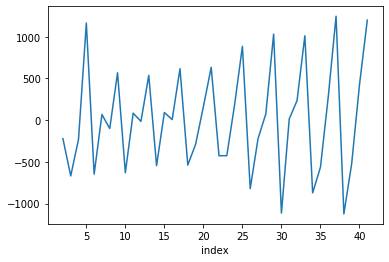

In [36]:
coke_diff2.plot()

#### The data has become stationary after 2nd order of differentiation

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

### Plotting auto correlation and partial correlation plot

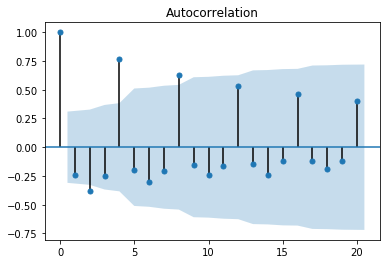

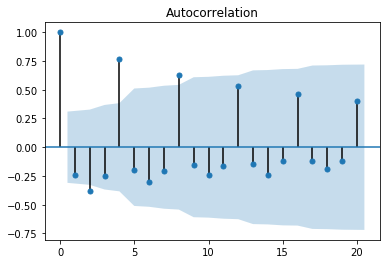

In [38]:
plot_acf(coke_diff2.dropna(),lags=20)

#### The 'q' value for ARIMA model can be taken as 0 referring the above plot

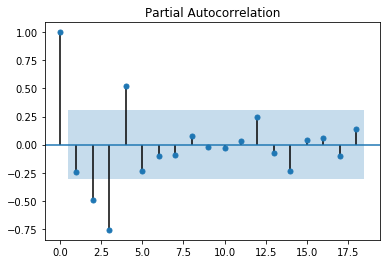

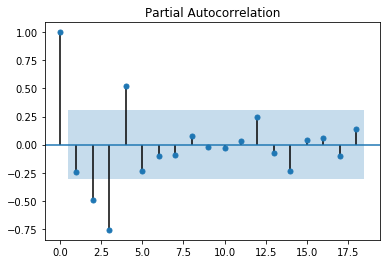

In [39]:
plot_pacf(coke_diff2.dropna(),lags=18)

#### The 'p' value for ARIMA model can be taken as 0 referring the above plot

## Model building

In [40]:
from statsmodels.tsa.arima_model import ARIMA

In [82]:
model=ARIMA(coke['Sales'],order=(0,2,0))
model_fit=model.fit()

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [83]:
model_fit.aic

633.3976676318601

In [84]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   40
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -314.699
Method:                           css   S.D. of innovations            631.774
Date:                Tue, 27 Oct 2020   AIC                            633.398
Time:                        22:55:33   BIC                            636.775
Sample:                             2   HQIC                           634.619
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7217     99.892      0.137      0.891    -182.064     209.507
==============================================================================
"""

In [86]:
# Checking other values for p,d,q for which the AIC should be the lowest

In [112]:
p=0
d=2
q=0

In [113]:
pdq=[]
aic=[]

In [114]:
import warnings
warnings.filterwarnings('ignore')
for q in range(4):
    try:
        model=ARIMA(coke.Sales, order=(p,d,q)).fit(disp=0)
        x= model.aic
        x1=p,d,q
        aic.append(x)
        pdq.append(x1)
    except:
        pass

keys=pdq
values=aic
d=dict(zip(keys,values))
print(d)

{(0, 2, 0): 633.3976676318601, (0, 2, 1): 608.9435808960338, (0, 2, 2): 593.1928392438945, (0, 2, 3): 618.5524422768146}


#### For order of (0,2,2) AIC value is least at 593.19, hence building model at this order

In [115]:
model=ARIMA(coke['Sales'],order=(0,2,2))
model_fit=model.fit()

In [116]:
model_fit.aic

593.1928392438945

### Predicting the values for this model

In [117]:
coke.shape

(42, 3)

In [118]:
coke.tail()

,Quarter,Sales,forecast
index,,,
37,Q2_95,4936.0,4199.224395
38,Q3_95,4895.0,3762.137624
39,Q4_95,4333.0,3381.247224
40,Q1_96,4194.0,3348.840327
41,Q2_96,5253.0,4072.616093


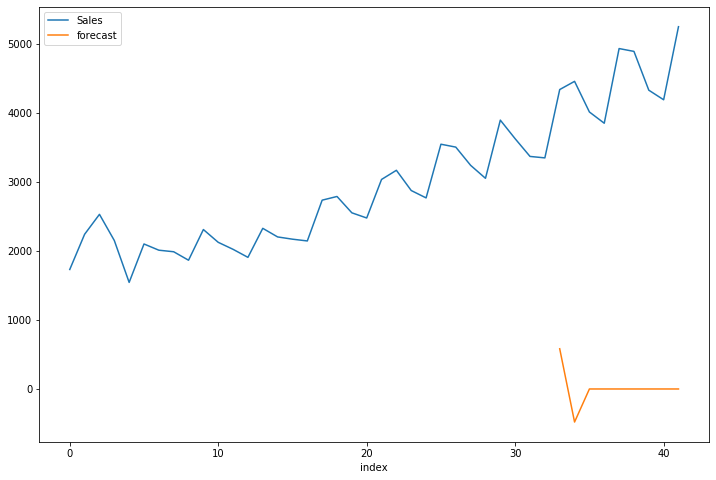

In [119]:
coke['forecast']=model_fit.predict(start=33,end=41,dynamic=True)
coke[['Sales','forecast']].plot(figsize=(12,8))

### Using the SARIMAX to predict the values for seasonal data

In [120]:
import statsmodels.api as sm

In [127]:
model=sm.tsa.statespace.SARIMAX(coke['Sales'],order=(0, 2, 2),seasonal_order=(0,2,2,4))
results=model.fit()

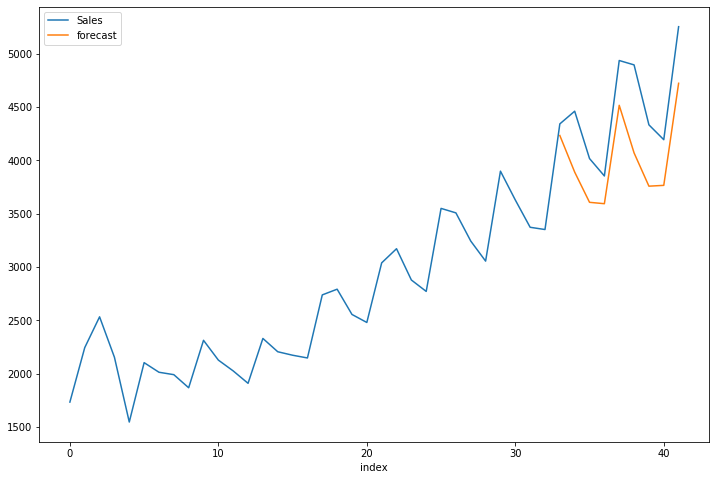

In [128]:
coke['forecast']=results.predict(start=33,end=41,dynamic=True)
coke[['Sales','forecast']].plot(figsize=(12,8))

#### Forecasted value is very similar to the acutal values, hence the model is good

### Forecasting the future values

In [129]:
future_dates=[x for x in range(42,50)]

In [130]:
len(future_dates)

8

In [131]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=coke.columns)

In [132]:
future_df=pd.concat([coke,future_dates_df], axis=0)

In [133]:
future_df.shape

(49, 3)

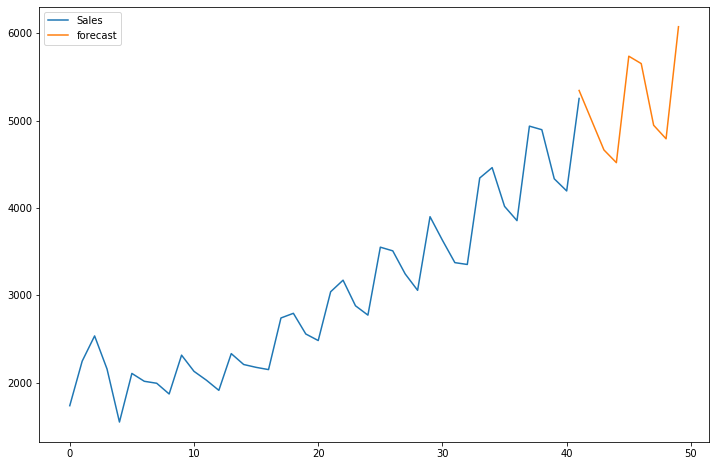

In [134]:
future_df['forecast'] = results.predict(start = 41, end = 49, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

#### The forecasted values looks good as it follows both trend and seasonality of original data

In [135]:
# Forecasted values of 2 future years

In [136]:
future_df['forecast'].iloc[41:]

41    5344.362939
43    4663.259373
44    4517.758903
45    5736.844356
46    5652.243371
47    4946.142575
48    4791.007637
49    6074.748091
Name: forecast, dtype: float64